In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set()

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Normalisation
from sklearn.preprocessing import MinMaxScaler

# Train test split & Cross Validation
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Feature Engineering

In [7]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

##### Perform one hot encoding

In [8]:
df = pd.get_dummies(df, columns=cat_cols)

##### Convert Year columns into Age Columns

In [9]:
df[['YearBuilt','GarageYrBlt','YrSold','YearRemodAdd']]=2023-df[['YearBuilt','GarageYrBlt','YrSold','YearRemodAdd']]

### Feature Selection

##### Pick columns with high correlation with dependent variable as features

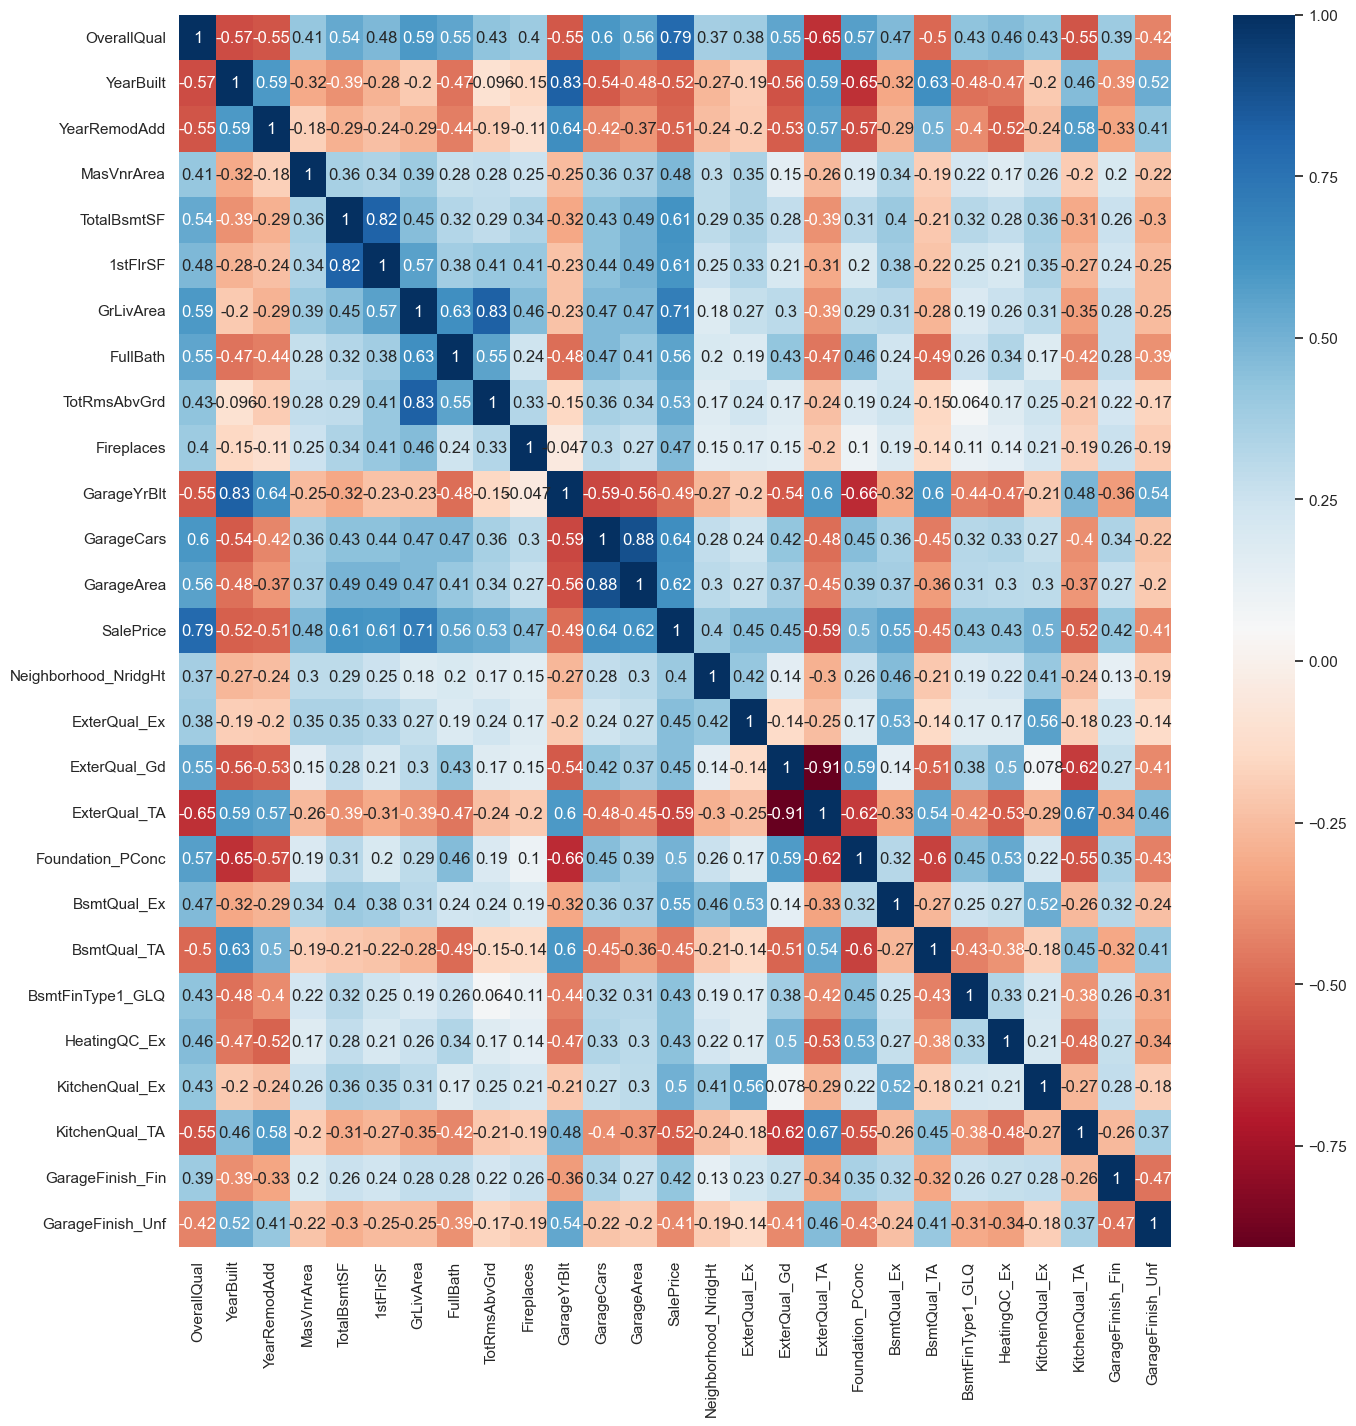

In [10]:
#find correlation matrix
corr_mat=df.corr()

#Select variables have more than 0.5 or less than -0.5 correlation with the dependent variable(SalePrice)
features=corr_mat[abs(corr_mat["SalePrice"])>0.4].index

#plot the heatmap
plt.figure(figsize=(16,16))
ax = sns.heatmap(df[features].corr(),annot=True,cmap='RdBu')

In [11]:
X = df[features.drop(['SalePrice'])]

In [12]:
#count rows of missing data for each column
missing_number=X.isnull().sum().sort_values(ascending=False)

#Calculate percentage of null value
missing_percentage=missing_number/len(X)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(20)

,missing number,missing percentage
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
OverallQual,0,0.000000
ExterQual_Ex,0,0.000000
GarageFinish_Fin,0,0.000000
KitchenQual_TA,0,0.000000
KitchenQual_Ex,0,0.000000
HeatingQC_Ex,0,0.000000
BsmtFinType1_GLQ,0,0.000000
BsmtQual_TA,0,0.000000


In [13]:
X.GarageYrBlt = X.GarageYrBlt.fillna(X.GarageYrBlt.median())
X.MasVnrArea = X.MasVnrArea.fillna(X.MasVnrArea.median())

In [14]:
#Compute VIF data for each independent variable
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,OverallQual,63.033129
1,YearBuilt,14.531911
2,YearRemodAdd,9.097594
3,MasVnrArea,1.916675
4,TotalBsmtSF,26.464085
5,1stFlrSF,39.518800
6,GrLivArea,50.487554
7,FullBath,21.606311
8,TotRmsAbvGrd,59.103696
9,Fireplaces,2.801443


##### Drop columns with high inter-correlation (>0.8) and VIF Factor

In [15]:
X = X.drop(columns=['TotRmsAbvGrd', 'ExterQual_TA', 'GarageArea', 'TotalBsmtSF'])
X.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF',
       'GrLivArea', 'FullBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'GarageFinish_Fin',
       'GarageFinish_Unf'],
      dtype='object')

In [16]:
y = df.SalePrice

##### Split data into training, validation, and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

### Feature Normalisation

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Train models using KFolds Cross Validation

##### Linear Regression

In [19]:
# define the model
linreg = LinearRegression()

# specify the hyperparameters to tune and their ranges
linear_params = {'fit_intercept': [True, False]}

# perform hyperparameter tuning using grid search with cross-validation
linear_gs = GridSearchCV(linreg, linear_params, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
linear_gs.fit(X_train_scaled, y_train)
cv_results_linear = cross_validate(linreg, X_val_scaled, y_val, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'])

##### Ridge Regression

In [20]:
# define the model
linridge = Ridge()

# specify the hyperparameters to tune and their ranges
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# perform hyperparameter tuning using grid search with cross-validation
ridge_gs = GridSearchCV(linridge, ridge_params, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
ridge_gs.fit(X_train_scaled, y_train)
cv_results_ridge = cross_validate(ridge_gs.best_estimator_, X_val_scaled, y_val, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'])

##### Lasso Regression

In [21]:
# define the model
linlasso = Lasso()

# define the grid of hyperparameters to search over
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# perform hyperparameter tuning using grid search with cross-validation
lasso_gs = GridSearchCV(linlasso, lasso_params, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
lasso_gs.fit(X_train_scaled, y_train)
cv_results_lasso = cross_validate(lasso_gs.best_estimator_, X_val_scaled, y_val, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'])

### Evaluation

In [22]:
print('Linear Regression:')
print(f"MAE: {cv_results_linear['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {cv_results_linear['test_neg_mean_squared_error'].mean()}")
print(f"RMSE: {cv_results_linear['test_neg_root_mean_squared_error'].mean()}")
print(f"R2: {cv_results_linear['test_r2'].mean()}\n")

print("Ridge Regression:")
print(f"MAE: {cv_results_ridge['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {cv_results_ridge['test_neg_mean_squared_error'].mean()}")
print(f"RMSE: {cv_results_ridge['test_neg_root_mean_squared_error'].mean()}")
print(f"R2: {cv_results_ridge['test_r2'].mean()}\n")

print("Lasso Regression:")
print(f"MAE: {cv_results_lasso['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {cv_results_lasso['test_neg_mean_squared_error'].mean()}")
print(f"RMSE: {cv_results_lasso['test_neg_root_mean_squared_error'].mean()}")
print(f"R2: {cv_results_lasso['test_r2'].mean()}")

Linear Regression:
MAE: -22799.117077388946
MSE: -1090864382.8429885
RMSE: -32609.706988272956
R2: 0.8245178622600335

Ridge Regression:
MAE: -22729.758545339166
MSE: -1116392964.8612826
RMSE: -32888.84802091027
R2: 0.8248305050915434

Lasso Regression:
MAE: -22795.574355759054
MSE: -1090735371.1047368
RMSE: -32607.57756354391
R2: 0.8245494628952583


##### Evaluate the performance of the best model (Lasso Regression) on test set

In [23]:
cv_results_lasso = cross_validate(lasso_gs.best_estimator_, X_test_scaled, y_test, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'])

In [24]:
print("Lasso Regression:")
print(f"MAE: {cv_results_lasso['test_neg_mean_absolute_error'].mean()}")
print(f"MSE: {cv_results_lasso['test_neg_mean_squared_error'].mean()}")
print(f"RMSE: {cv_results_lasso['test_neg_root_mean_squared_error'].mean()}")
print(f"R2: {cv_results_lasso['test_r2'].mean()}")

Lasso Regression:
MAE: -28951.170230808995
MSE: -2722859885.4182076
RMSE: -48019.55195801414
R2: 0.6516021379941254


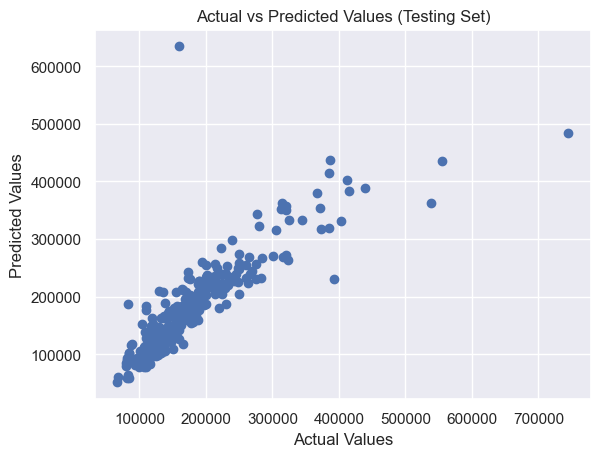

In [25]:
y_pred = lasso_gs.best_estimator_.predict(X_test_scaled)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Testing Set)')
plt.show()